In [11]:
from larch import Interpreter
session = Interpreter()
import larch
from larch import io
from larch import xafs
from larch.io import read_ascii
from larch.xafs import pre_edge
from larch.xafs import mback

import matplotlib.pyplot as plt
import numpy as np

###フーリエ変換後の生データを再度読み込む###
###新たにファイルを作ったほうが、edge_step等も使える。###
dat = io.read_ascii("658_Pt-L1_PtO2_Si111_50ms_150611.txt", labels="energy mu")
data = io.read_ascii("output.txt", labels="energy mu")
larch.xafs.pre_edge(dat, _larch=session)
larch.xafs.pre_edge(data, _larch=session)

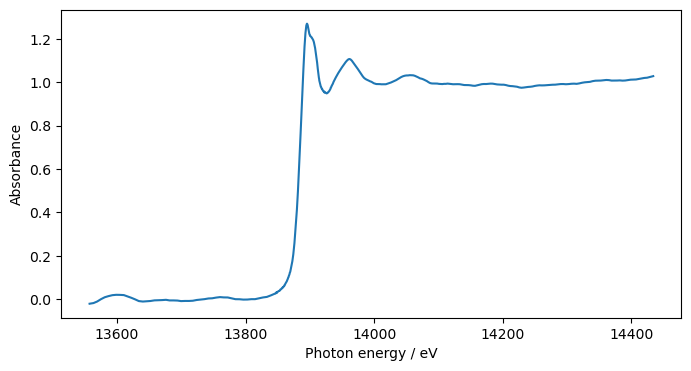

In [12]:
###規格化(フーリエ変換)後のデータ → これを使う###

fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.mu)
plt.xlabel("Photon energy / eV")
plt.ylabel("Absorbance")
plt.show()

In [13]:
data.mu #規格化された後のμt(Absorbance)です

array([-2.08936723e-02, -1.78252579e-02, -1.08237632e-02,  6.88036995e-05,
        8.96146836e-03,  1.41010396e-02,  1.85111391e-02,  2.01795142e-02,
        1.98890115e-02,  1.88916304e-02,  1.30150874e-02,  6.35591052e-03,
       -9.72067229e-04, -8.71730955e-03, -1.08563265e-02, -9.52381628e-03,
       -8.36200616e-03, -5.44397737e-03, -4.94412959e-03, -4.15553662e-03,
       -2.87793095e-03, -5.68006484e-03, -5.67395721e-03, -6.31092993e-03,
       -8.79343343e-03, -8.06544723e-03, -8.11885251e-03, -7.12177551e-03,
       -3.65064147e-03, -1.98033622e-03,  2.02711605e-04,  3.33640029e-03,
        4.13558584e-03,  7.38209526e-03,  9.61181532e-03,  8.23335730e-03,
        7.91566176e-03,  4.18264820e-03,  4.63321829e-07, -2.49492885e-04,
       -1.87090248e-03, -1.61409935e-03,  8.96166559e-05,  1.09779113e-04,
        3.95073315e-03,  8.06737179e-03,  1.05287569e-02,  1.77287599e-02,
        2.35047826e-02,  2.53999806e-02,  2.62499558e-02,  2.79171019e-02,
        2.75053942e-02,  

In [14]:
data.dmude #dμ/dEです

array([ 5.00308801e-04,  8.58053723e-04,  1.54297726e-03,  1.66735081e-03,
        1.20767566e-03,  8.03790959e-04,  5.09151241e-04,  1.18278008e-04,
       -1.07422775e-04, -5.80140107e-04, -1.07077560e-03, -1.17039170e-03,
       -1.29634542e-03, -8.27017918e-04, -6.55889408e-05,  2.13056442e-04,
        3.43499315e-04,  2.82218546e-04,  1.08377020e-04,  1.70410750e-04,
       -1.30206363e-04, -2.38558413e-04, -5.13410766e-05, -2.66529320e-04,
       -1.49208696e-04,  5.45857071e-05,  7.76740997e-05,  3.70497444e-04,
        4.28062595e-04,  3.19273528e-04,  4.32126312e-04,  3.30196568e-04,
        3.41095166e-04,  4.49898808e-04,  7.15166674e-05, -1.40059255e-04,
       -3.29753255e-04, -6.64084766e-04, -3.62289472e-04, -1.52979188e-04,
       -1.12059030e-04,  1.55883037e-04,  1.44353211e-04,  3.25612134e-04,
        6.37468660e-04,  5.38351227e-04,  7.85057457e-04,  1.18780552e-03,
        1.23147534e-03,  1.29465240e-03,  2.63620392e-03,  1.56127303e-03,
       -7.66884003e-04,  

In [15]:
###dμ/dEが最も大きい部分＝変曲点の1つ前のデータ###
max(data.dmude)

0.07551887603300904

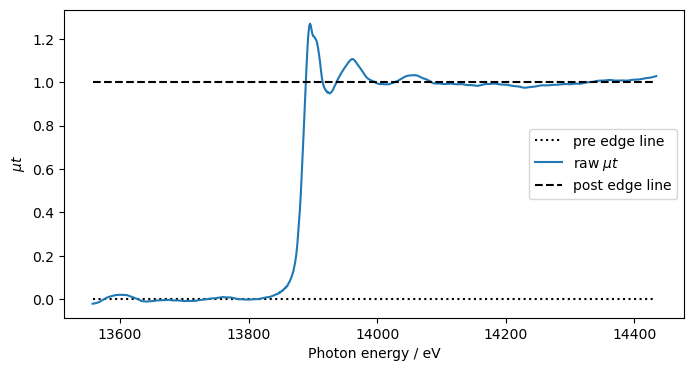

In [16]:
###pre_edge部分とpost_edge部分をグラフにすると次のとおりです。###
###横軸と平行に線が引かれています###

fig = plt.figure(figsize=(8, 4))
plt.plot(data.energy, data.pre_edge, linestyle=":", color="k", label="pre edge line")
plt.plot(data.energy, data.mu, label="raw $\mu t$")
plt.plot(data.energy, data.post_edge,linestyle="--", color="k", label="post edge line")
plt.xlabel("Photon energy / eV"); plt.ylabel("$\mu t$"); plt.legend()
plt.show()

In [17]:
#上の3つは、フーリエ変換前のものです。
#下の3つは、フーリエ変換後のものです。

print('e0(吸収端)は', dat.e0)
print('edge_stepは', dat.edge_step)
print('edgeの種類は', dat.edge)
print('')
print('e0(吸収端)は', data.e0)
print('edge_stepは', data.edge_step)
print('edgeの種類は', data.edge)

#edge_stepの値だけ変わっています。

e0(吸収端)は 13886.318471
edge_stepは 0.15216651341525456
edgeの種類は L1

e0(吸収端)は 13886.318471
edge_stepは 0.9999999999999928
edgeの種類は L1
